<a href="https://colab.research.google.com/github/oneoclockc/deeplearning-for-AI/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [6]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 46ms/step - loss: 0.5341 - accuracy: 0.7737 - val_loss: 0.4303 - val_accuracy: 0.8320
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3281 - accuracy: 0.8978 - val_loss: 0.3190 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2333 - accuracy: 0.9276 - val_loss: 0.2811 - val_accuracy: 0.8927
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1772 - accuracy: 0.9446 - val_loss: 0.2864 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1428 - accuracy: 0.9541 - val_loss: 0.2879 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1148 - accuracy: 0.9658 - val_loss: 0.2986 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0928 - accuracy: 0.9740 - val_loss: 0.3476 - val_accuracy: 0.8740
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [9]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [10]:
# 타겟 y를 one hot encoding
def to_one_hot(labels, dimension=2):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
#model2.compile()
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#model2.fit()
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5130 - accuracy: 0.7929 - val_loss: 0.3849 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3074 - accuracy: 0.9012 - val_loss: 0.3120 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2263 - accuracy: 0.9273 - val_loss: 0.2833 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1811 - accuracy: 0.9385 - val_loss: 0.2807 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1480 - accuracy: 0.9529 - val_loss: 0.2796 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1235 - accuracy: 0.9621 - val_loss: 0.2943 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1012 - accuracy: 0.9699 - val_loss: 0.3082 - val_accuracy: 0.8818
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

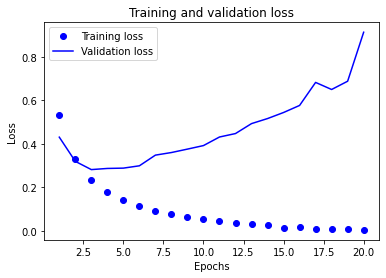

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [14]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(2, activation="softmax")
])

## retrain and visualize the validation loss of new model


In [15]:
#model2.compile()
model2_dr.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#model2.fit()
history_dr = model2_dr.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6333 - accuracy: 0.6967 - val_loss: 0.5461 - val_accuracy: 0.8535
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5121 - accuracy: 0.8165 - val_loss: 0.4317 - val_accuracy: 0.8755
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4111 - accuracy: 0.8657 - val_loss: 0.3652 - val_accuracy: 0.8701
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3358 - accuracy: 0.8935 - val_loss: 0.2996 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2795 - accuracy: 0.9118 - val_loss: 0.2805 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2353 - accuracy: 0.9269 - val_loss: 0.2734 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2004 - accuracy: 0.9402 - val_loss: 0.2746 - val_accuracy: 0.8903
Epoch 8/20
30

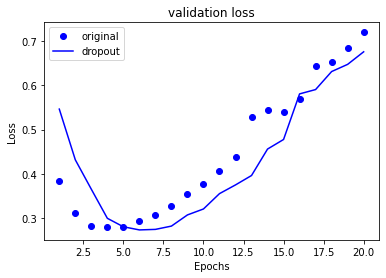

In [17]:
# visualize 

import matplotlib.pyplot as plt
history_dr_dict = history_dr.history
val_loss_values_dr = history_dr_dict["val_loss"]
history2_dict = history2.history
val_loss_values2 = history2_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss_values2, "bo", label="original")
plt.plot(epochs, val_loss_values_dr, "b", label="dropout")
plt.title("validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [20]:
## Add l1 regularization on the second dense layers 
from tensorflow.keras import regularizers
model2_l1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.002),
                 activation="relu"),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])

In [19]:
#model2.compile()
model2_l1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#model2.fit()
history_l1 = model2_l1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6703 - accuracy: 0.7895 - val_loss: 0.5423 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4585 - accuracy: 0.8971 - val_loss: 0.4350 - val_accuracy: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3585 - accuracy: 0.9209 - val_loss: 0.3976 - val_accuracy: 0.8831
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3007 - accuracy: 0.9349 - val_loss: 0.3705 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2608 - accuracy: 0.9471 - val_loss: 0.3645 - val_accuracy: 0.8926
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2307 - accuracy: 0.9557 - val_loss: 0.3779 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2080 - accuracy: 0.9619 - val_loss: 0.3705 - val_accuracy: 0.8877
Epoch 8/20
30

### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

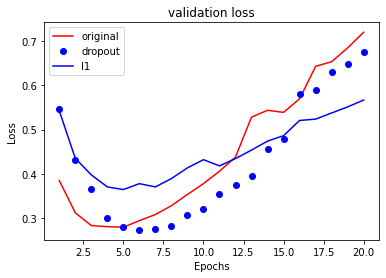

In [25]:
# visualize 
import matplotlib.pyplot as plt
history_dr_dict = history_dr.history
history_l1_dict = history_l1.history
history2_dict = history2.history
val_loss_values2 = history2_dict["val_loss"]
val_loss_values_dr = history_dr_dict["val_loss"]
val_loss_values_l1 = history_l1_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss_values2, "b", label="original", color="red")
plt.plot(epochs, val_loss_values_dr, "bo", label="dropout")
plt.plot(epochs, val_loss_values_l1, "b", label="l1")
plt.title("validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()